In [5]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


In [6]:
train_path = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/train"
validation_path = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/validation"

In [7]:
training_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                       height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [9]:
training_data = training_data_gen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.


In [10]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [11]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

In [12]:
validate_data = training_data_gen.flow_from_directory(validation_path, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 256 images belonging to 2 classes.


In [13]:
def plotImage(image_array):
  fig, axes = plt.subplots(1,5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(image_array, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

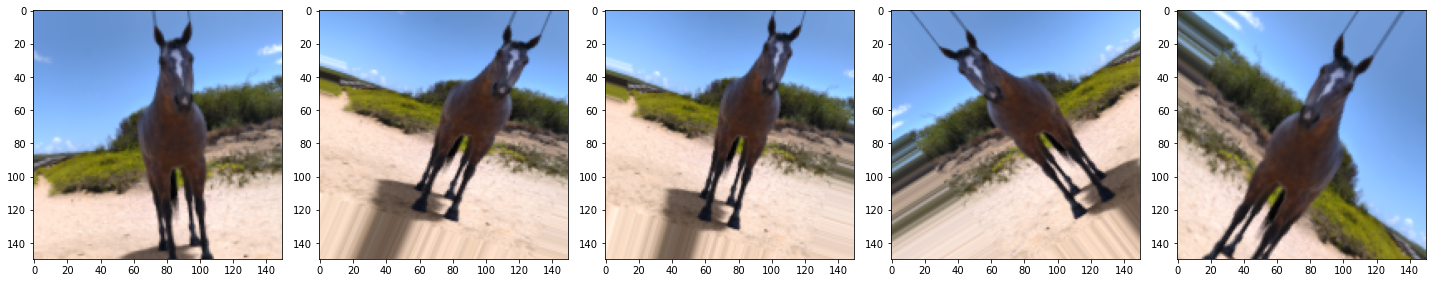

In [14]:
images = [training_data[0][0][0] for i in range(10)]
plotImage(images)

In [15]:
from keras.backend import dropout
## Building CNN Model
conv_model = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                      keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3),
                                      keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      keras.layers.Conv2D(filters=128, kernel_size=3),
                                      keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      keras.layers.Conv2D(filters=256, kernel_size=3),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.1),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=2, activation='softmax')
])

2023-01-18 12:45:27.451530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
conv_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
from tensorflow.python.training.tracking.util import Checkpoint
## find accurate epoche value and save its
model_path = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/horse_human_predictor.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [20]:
history = conv_model.fit(training_data,
                         epochs=100,
                         verbose=1,
                         validation_data = validate_data,
                         callbacks = callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.7020
Epoch 1: val_accuracy improved from -inf to 0.51172, saving model to /media/dipu-dts/Data_Drive/Data_Science/horse-or-human/horse_human_predictor.h5
33/33 [==============================] - 17s 517ms/step - loss: 0.5797 - accuracy: 0.7020 - val_loss: 1.1141 - val_accuracy: 0.5117
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.5149 - accuracy: 0.7634
Epoch 2: val_accuracy improved from 0.51172 to 0.53906, saving model to /media/dipu-dts/Data_Drive/Data_Science/horse-or-human/horse_human_predictor.h5
33/33 [==============================] - 17s 518ms/step - loss: 0.5149 - accuracy: 0.7634 - val_loss: 1.3070 - val_accuracy: 0.5391
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8053
Epoch 3: val_accuracy improved from 0.53906 to 0.57031, saving model to /media/dipu-dts/Data_Drive/Data_Science/horse-or-human/horse_human_predictor.h

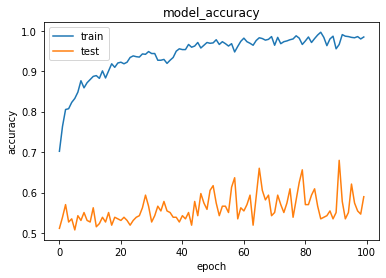

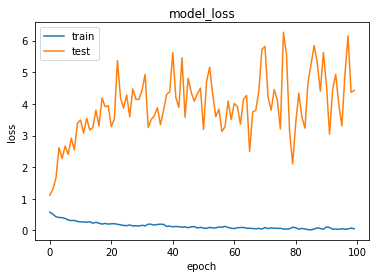

In [33]:
## Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model_path01 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/horse_human_predictor.h5"

In [35]:
model1 = keras.models.load_model(model_path01)

In [42]:
import numpy as np
import keras.utils as image

In [43]:
print(dir(image))

['CustomObjectScope', 'GeneratorEnqueuer', 'OrderedEnqueuer', 'Progbar', 'Sequence', 'SequenceEnqueuer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'array_to_img', 'audio_dataset', 'audio_dataset_from_directory', 'control_flow_util', 'conv_utils', 'custom_object_scope', 'data_utils', 'dataset_creator', 'dataset_utils', 'deserialize_keras_object', 'generic_utils', 'get_custom_objects', 'get_file', 'get_source_inputs', 'image_dataset', 'image_dataset_from_directory', 'image_utils', 'img_to_array', 'io_utils', 'keras_logging', 'layer_utils', 'load_img', 'losses_utils', 'metrics_utils', 'mode_keys', 'model_to_dot', 'normalize', 'np_utils', 'object_identity', 'pad_sequences', 'plot_model', 'save_img', 'serialize_keras_object', 'set_random_seed', 'split_dataset', 'text_dataset', 'text_dataset_from_directory', 'tf_contextlib', 'tf_inspect', 'tf_utils', 'timeseries_dataset', 'timeseries_dataset_from_array', 'to_categori

In [44]:
def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size=(150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis= 0)
  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "====>", pred)

  if pred == 0:
    print("Predicted ==> Horse")
  else:
    print("predicted ==> Human")  

In [45]:
# Humon Image
humon1 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/hu1.jpg"
humon2 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/hu2.jpeg"
humon3 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/hu3.jpeg"
humon4 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/hu4.jpeg"
humon5 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/hu5.jpg"

In [46]:
hr1 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/h1.jpg"
hr2 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/h2.jpg"
hr3 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/h3.jpg"
hr4 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/h4.jpg"
hr5 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/h5.jpg"
hr6 = "/media/dipu-dts/Data_Drive/Data_Science/horse-or-human/Testing_Image/h6.jpg"

In [53]:
for horse_or_human in [hr1, hr2, hr3, hr4, hr5, hr6, humon1]:
  pred_human_horse(model1, horse_or_human)

1/1 [==============================] - 0s 49ms/step
[[1. 0.]] ====> 0
Predicted ==> Horse
1/1 [==============================] - 0s 26ms/step
[[0.951 0.049]] ====> 0
Predicted ==> Horse
1/1 [==============================] - 0s 22ms/step
[[1. 0.]] ====> 0
Predicted ==> Horse
1/1 [==============================] - 0s 32ms/step
[[0.297 0.703]] ====> 1
predicted ==> Human
1/1 [==============================] - 0s 22ms/step
[[0.999 0.001]] ====> 0
Predicted ==> Horse
1/1 [==============================] - 0s 26ms/step
[[0. 1.]] ====> 1
predicted ==> Human
1/1 [==============================] - 0s 24ms/step
[[0.704 0.296]] ====> 0
Predicted ==> Horse
